<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://cdn.miami.edu/_assets-common/images/system/um-logo-gray-bg.png" alt="Miami Logo" style="height: 98px;">
</div>

<h1>MPO 624: EOF analysis of monthly SST</h1>
<h3>Uses OpenDAP link to ERSST online at NOAA-PSD</h3>


<div style="clear:both"></div>
</div>

<hr style="height:2px;">

### Links to subsections
1. <a href="#opendap">OpenDAP: from a URL not a file</a>


In [2]:
import xarray as xr 
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


In [3]:
from eofs.standard import Eof # import standard eofs from python eofs package, 
                              # to install eofs package use `conda install eofs` in environment you want to add it to
                              # for API see http://ajdawson.github.io/eofs/api/index.html for more information.

## Now we could do EOFs for ANY function of time and (perhaps 2D) space! 
Like a video...

In [1]:
import imageio

filename = '30029276_581285785563432_989649892934086558_n.mp4'
vid = imageio.get_reader(filename,  'ffmpeg')

#for i, im in enumerate(vid):
#    print('Mean of frame %i is %1.1f' % (i, im.mean()))


(640, 640, 3)


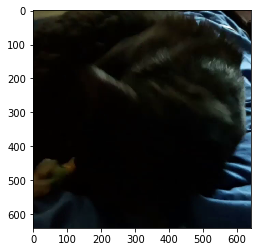

In [4]:
plt.imshow(vid.get_data(100))
print(np.shape(vid.get_data(100)))

In [ ]:
NFRAMES=23
stride = 10

dataset = np.zeros( (NFRAMES,540, 960, 3) )

for i in range(0,(NFRAMES-1)): 
    im = vid.get_data(i*stride)
    dataset[i,:,:,:] = im

np.shape(dataset)

## Now just how to display arrays that shape as a movie, dammit. 
### Colors are screwy. 
#### Yet plain old plt.imshow(vid.get_data(100)) worked above. 

In [1]:
test = Image.fromarray(np.uint8(dataset[30,:,:,:]))
plt.imshow(test)

NameError: name 'Image' is not defined

In [ ]:
# Yet another package to install, to get colors right
#from opencv-python import cv2
#import cv2

# another approach: flig BGR to RGB
#imcolor = cv2.cvtColor(dataset[0,:,:,:], cv2.COLOR_BGR2RGB)


# OK it's art, screw the color realism

# Set up the frame
fig, ax = plt.subplots(figsize=(10,5))
imcolor = np.flip(dataset[0,:,:,:], 2)
im = ax.imshow(imcolor)

# Build the artists array
artists = []
for it in range(0, NFRAMES-1):   
#    imcolor = cv2.cvtColor(dataset[it,:,:,:], cv2.COLOR_BGR2RGB)
    imcolor = np.flip(dataset[it,:,:,:], 2)
    im = ax.imshow(imcolor)
    artists.append([im]) # NOTE THE LIST

manimation.ArtistAnimation(fig, artists, interval=50)

When converting from RGB to grayscale, it is said that specific weights to channels R, G, and B ought to be applied. These weights are: 0.2989, 0.5870, 0.1140.

In [75]:
BWim = 0.2989*im1[:,:,0] + 0.5870*im1[:,:,1] + 0.1140*im1[:,:,2]

TypeError: memoryview: invalid slice key

(300, 451, 3)


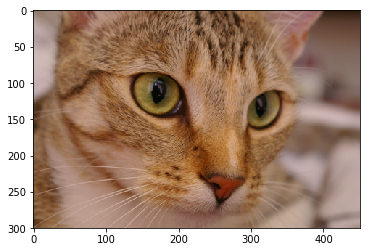

In [69]:
# from the docs, https://imageio.readthedocs.io/en/stable/examples.html
im = imageio.imread('imageio:chelsea.png')
print(im.shape)
plt.imshow(im)

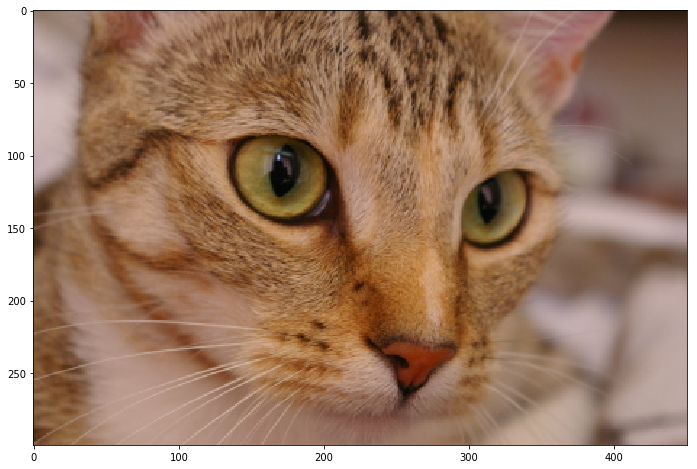

In [167]:
fig, ax = plt.subplots(figsize=(12,8))

#imcolor = np.flip(dataset[0,:,:,:], 2)
im = imageio.imread('imageio:chelsea.png')
im = ax.imshow(im)
